# Use VGG16 to classify fruits
Note :

*    Reading the CNN and VGG16 structure first makes construction
easier.
*   Data collected is taken from kaggle including 10 classes
*   The path changes according to your preferences

## To understand better, you can view your report outside.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AI_project/Fruit_Classification

/content/drive/MyDrive/AI_project/Fruit_Classification


## Unzip the rar Dataset file


In [ ]:
!pip install unzip

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1283 sha256=77dff1eed7eb53b19c2dddcd6c07df0c5a928fde887dc6a26b839cdb8a3776b3
  Stored in directory: /root/.cache/pip/wheels/80/dc/7a/f8af45bc239e7933509183f038ea8d46f3610aab82b35369f4
Successfully built unzip


In [ ]:
!unzip -q /content/drive/MyDrive/AI_project/Fruit_Classification/Dataset.zip -d /content/drive/MyDrive/AI_project/Fruit_Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

In [ ]:
%cd /content/drive/MyDrive/AI_project/Fruit_Classification/Dataset

/content/drive/MyDrive/AI_project/Fruit_Classification/Dataset


## 1. Data preprocessing

### Create train set

Because I wanted to train the model quickly, I formatted the images to 24*24 to reduce training data. Helps the model work faster. That can also cause loss of necessary data causing errors.

Note: Please consider when changing the size

In [ ]:
#Can change according to your path
directory_train="./train"

class_name_train=["banana","avocado","cherry","kiwi","mango","orange","pinenapple","watermelon"]



train_arrays=[]

for i in class_name_train:
    path=os.path.join(directory_train,i)

    class_number_train=class_name_train.index(i)
    for img in os.listdir(path):
        #read image
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array=cv2.resize(img_array,(24,24))

        train_arrays.append([img_array,class_number_train])

In [ ]:
length_arr_train = len(train_arrays)
print("Length train arrays:", length_arr_train)
print("First element of train_arrays:", train_arrays[0])

Length train arrays: 1840
First element of train_arrays: [array([[[ 16,  28,   4],
        [  8,  15,   7],
        [  6,  11,   7],
        ...,
        [154, 180, 142],
        [ 98, 121,  84],
        [105, 129, 103]],

       [[ 16,  27,  11],
        [ 16,  29,  13],
        [  8,  11,  12],
        ...,
        [181, 206, 175],
        [100, 127,  95],
        [ 53,  65,   6]],

       [[ 15,  28,  16],
        [ 20,  33,  15],
        [ 44,  64,  41],
        ...,
        [199, 216, 205],
        [166, 181, 170],
        [ 53,  72,  40]],

       ...,

       [[ 25,  41,  12],
        [ 19,  38,  10],
        [ 18,  34,  14],
        ...,
        [ 37,  76,  22],
        [ 71, 103,  71],
        [ 51,  88,  21]],

       [[ 23,  39,  10],
        [ 23,  42,  14],
        [ 18,  33,  16],
        ...,
        [ 39,  79,  19],
        [ 41,  81,  21],
        [ 51,  94,  21]],

       [[ 21,  37,   8],
        [ 23,  42,  14],
        [ 19,  33,  17],
        ...,
        [ 42,  8

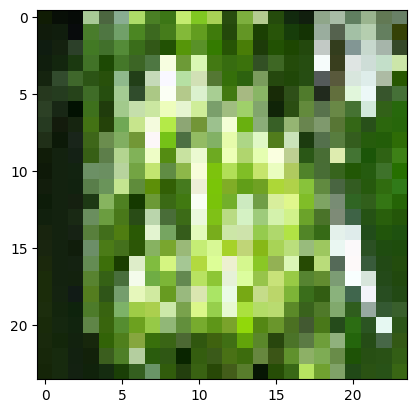

In [ ]:
plt.imshow(train_arrays[0][0])

### Use Matplotlib Pie Chart to visualize data

In [ ]:
# Create a dictionary to count the number of images in each class
class_counts = {cls: 0 for cls in class_name_train}
for img_class in train_arrays:
    class_counts[class_name_train[img_class[1]]] += 1

In [ ]:
print(class_counts)

{'banana': 230, 'avocado': 230, 'cherry': 230, 'kiwi': 230, 'mango': 231, 'orange': 229, 'pinenapple': 230, 'watermelon': 230}


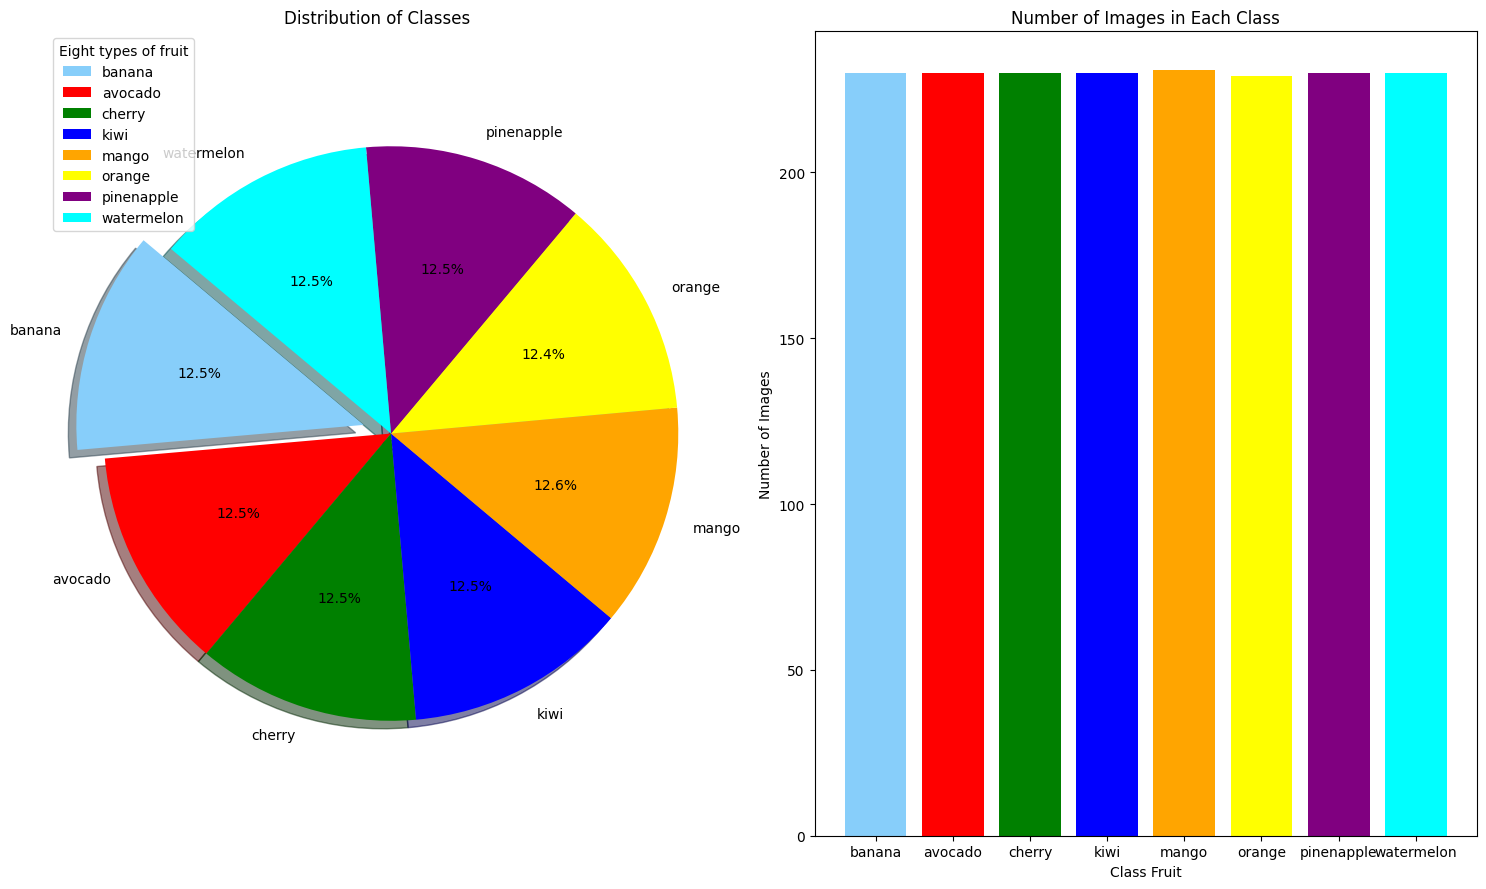

In [70]:
# Prepare data for pie chart
labels = class_counts.keys()
sizes = class_counts.values()

# Color selection

colors =  [ 'lightskyblue', 'red', 'green', 'blue', 'orange','yellow','purple','cyan']


# Shows the embossed part
explode = (0.1,0, 0, 0, 0, 0, 0, 0, )

# Create Pie Chart on frame one
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
# Equal aspect ratio ensures pie chart
plt.axis('equal')
plt.title('Distribution of Classes')
plt.legend(title="Eight types of fruit")

# Draw a column chart in frame two
plt.subplot(1, 2, 2)
plt.bar(labels, sizes, color=colors)
plt.title('Number of Images in Each Class')
plt.xlabel('Class Fruit')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


### Create validation set

In [ ]:
directory_valid="./valid"
class_name_valid =["banana","avocado","cherry","kiwi","mango","orange","pinenapple","watermelon"]

valid_arrays=[]

for i in class_name_valid:
    path=os.path.join(directory_valid,i)
    class_number_valid=class_name_valid.index(i)
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        img_array2=cv2.resize(img_array2,(24,24))
        valid_arrays.append([img_array2,class_number_valid])

### Create validation set

In [ ]:
directory_test="./test"
class_name_test =["banana","avocado","cherry","kiwi","mango","orange","pinenapple","watermelon"]


test_arrays=[]

for i in class_name_test:
    path=os.path.join(directory_test,i)
    class_number_test=class_name_test.index(i)
    for img in os.listdir(path):
        img_array3=cv2.imread(os.path.join(path,img))
        img_array3=cv2.cvtColor(img_array3, cv2.COLOR_BGR2RGB)
        img_array3=cv2.resize(img_array3,(24,24))
        test_arrays.append([img_array3,class_number_test])

### Show some layered fruiti

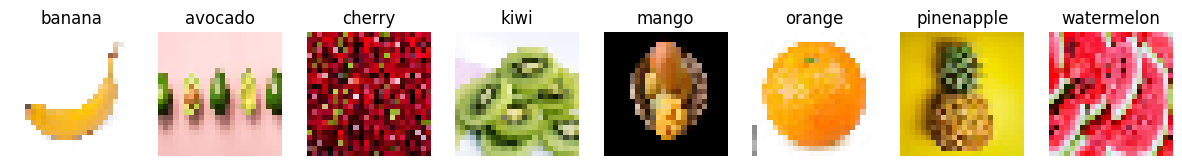

In [ ]:
fruits_array_train = []


added_fruits = {cls: False for cls in class_name_train}


for features, label in test_arrays:
    cls = class_name_train[label]
    if not added_fruits[cls]:
        fruits_array_train.append(features)
        added_fruits[cls] = True
        if all(added_fruits.values()):
            break

plt.figure(figsize=(15, 8))
for i, img in enumerate(fruits_array_train):
    plt.subplot(1, len(fruits_array_train), i + 1)
    plt.imshow(img)
    plt.title(class_name_train[i])
    plt.axis("off")

plt.show()


### Perform data shuffling

In [ ]:
from sklearn.utils import shuffle

In [ ]:

train_arrays = shuffle(train_arrays)
valid_arrays = shuffle(valid_arrays)
test_arrays = shuffle(test_arrays)

X_train=[]
Y_train=[]
for features,label in train_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train)

X_valid=[]
Y_valid=[]
for features,label in valid_arrays:
    X_valid.append(features)
    Y_valid.append(label)
X_valid=np.array(X_valid)


X_test=[]
Y_test=[]
for features,label in test_arrays:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test)


In [ ]:
print("Shape of X_train before reshaping: ", X_train.shape)

Shape of X_train before reshaping:  (1840, 24, 24, 3)


### Normalize data [0-1] and reshape the image

In [ ]:
image_resize = 24
X_train=X_train.reshape(-1,image_resize,image_resize,3)
X_train=X_train /255.0

X_valid=X_valid.reshape(-1,image_resize,image_resize,3)
X_valid=X_valid /255.0

X_test=X_test.reshape(-1,image_resize,image_resize,3)
X_test=X_test /255.0

print("shape of X_train= ",X_train.shape)
print("shape of X_valid= ",X_valid.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (1840, 24, 24, 3)
shape of X_valid=  (833, 24, 24, 3)
shape of X_test=   (38, 24, 24, 3)


### Convert labels to a binary labels matrix

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#Converted our labels to one-hot-encoding values. Ex : 1 ----->[0,1,0,0,0,0,0,0,0,0]
lb = LabelBinarizer()

In [ ]:
Y_train= lb.fit_transform(Y_train)
Y_valid= lb.fit_transform(Y_valid)
Y_test= lb.fit_transform(Y_test)

In [ ]:
print(Y_train[1])

[0 0 0 0 0 0 1 0]


## 2. Build model VGG16

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding="Same",activation="relu",input_shape=(24,24,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding="Same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),padding="Same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding="Same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(8,activation="softmax"))

#defining optimizer
optimizer=Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=500
batch_size=32

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_9 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                      

### In this section, we will perform data augmentation. We will add different shapes to our images. We will use zoom, move, rotate, and flip methods to avoid overshooting.


In [ ]:
datagen=ImageDataGenerator(
                           rotation_range=0.2,    #rotate 20% degree
                           zoom_range=0.2,        #zoom in-out 20%
                           width_shift_range=0.2, #shift 20%
                           height_shift_range=0.2,#shift 20%
                           horizontal_flip=True,  #randomly flip images
                           vertical_flip=True,
                           )

datagen.fit(X_train)
datagen.fit(X_valid)

#model fitting
history=model.fit(datagen.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(X_valid,Y_valid),steps_per_epoch=X_train.shape[0]//batch_size)


Epoch 1/500
57/57 [==============================] - 12s 182ms/step - loss: 10.3343 - accuracy: 0.2345 - val_loss: 5.7484 - val_accuracy: 0.1717
Epoch 2/500
57/57 [==============================] - 8s 146ms/step - loss: 1.7870 - accuracy: 0.3590 - val_loss: 3.7460 - val_accuracy: 0.1236
Epoch 3/500
57/57 [==============================] - 8s 144ms/step - loss: 1.6037 - accuracy: 0.4015 - val_loss: 2.2846 - val_accuracy: 0.1501
Epoch 4/500
57/57 [==============================] - 10s 169ms/step - loss: 1.5318 - accuracy: 0.4298 - val_loss: 2.5022 - val_accuracy: 0.1957
Epoch 5/500
57/57 [==============================] - 10s 177ms/step - loss: 1.4646 - accuracy: 0.4690 - val_loss: 1.7586 - val_accuracy: 0.3553
Epoch 6/500
57/57 [==============================] - 8s 136ms/step - loss: 1.4706 - accuracy: 0.4497 - val_loss: 1.6218 - val_accuracy: 0.4502
Epoch 7/500
57/57 [==============================] - 9s 161ms/step - loss: 1.4518 - accuracy: 0.4715 - val_loss: 1.4864 - val_accuracy: 0.

## 3. Visualize model parameters

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Show accuracy

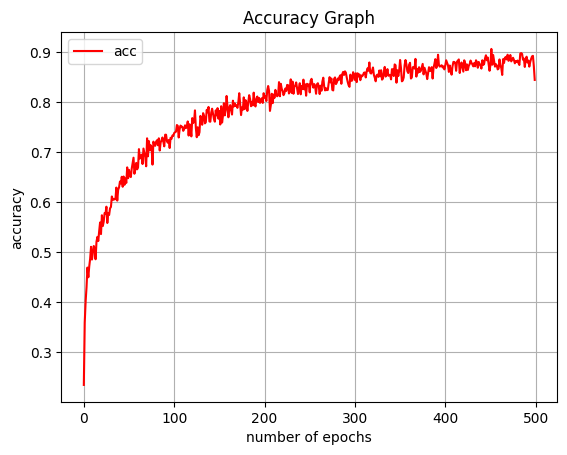

In [ ]:
plt.plot(history.history["accuracy"],color="r",label="acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

### Show plot loss and accuracy

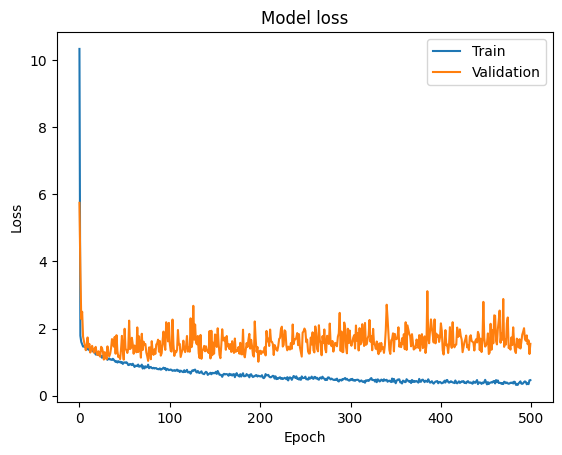

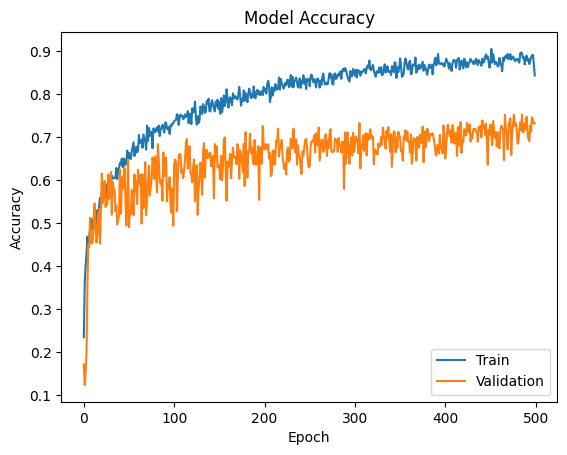

In [ ]:
# Plot the loss of training and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# Plot the accuracy of training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### Confusion matrix with data testing




2/2 [==============================] - 0s 25ms/step


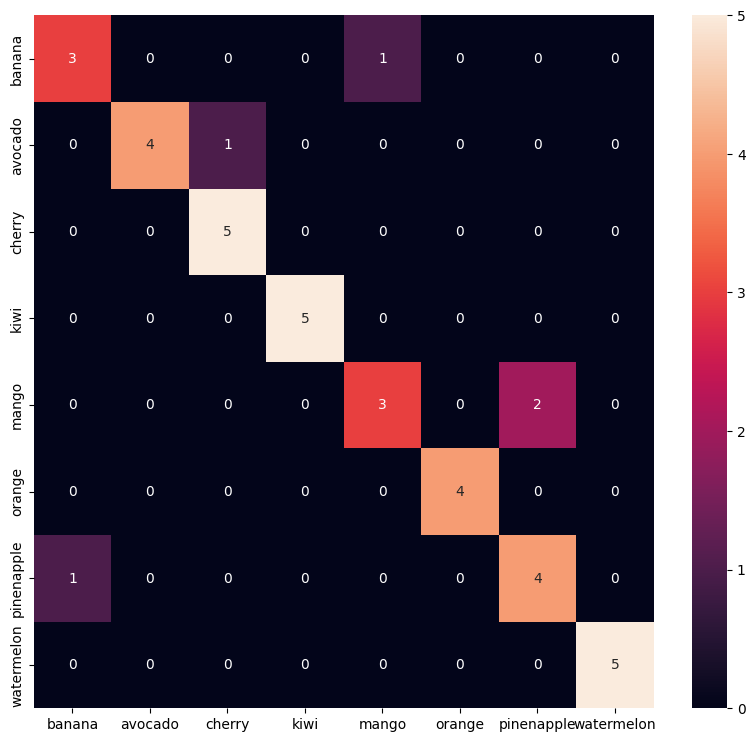

In [ ]:
#confusion matrix
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(Y_test,axis=1)
conf_mat=confusion_matrix(y_true,y_pred_classes)
fruit_names=["banana","avocado","cherry","kiwi","mango","orange","pinenapple","watermelon"]

f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=fruit_names))


              precision    recall  f1-score   support

      banana       0.75      0.75      0.75         4
     avocado       1.00      0.80      0.89         5
      cherry       0.83      1.00      0.91         5
        kiwi       1.00      1.00      1.00         5
       mango       0.75      0.60      0.67         5
      orange       1.00      1.00      1.00         4
  pinenapple       0.67      0.80      0.73         5
  watermelon       1.00      1.00      1.00         5

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38



## 3. Save the model and reuse it

### Save model

In [ ]:
%cd /content/drive/MyDrive/AI_project/Fruit_Classification/Model_Save

/content/drive/MyDrive/AI_project/Fruit_Classification/Model_Save


In [ ]:
model.save("VGG16_Fruit8.h5")

### Reuse the model

In [ ]:
import tensorflow as tf

In [ ]:
saved_model = tf.keras.models.load_model("VGG16_Fruit8.h5")

In [ ]:
%cd /content/drive/MyDrive/AI_project/Fruit_Classification

/content/drive/MyDrive/AI_project/Fruit_Classification


In [ ]:

# Path image
image1_path = './watermelon.jfif'
image2_path = './kiwi.jfif'

# Read image
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Convert image to RGB color space
image_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Resize the image to 32x32 size
image_rgb1 = cv2.resize(image_rgb1, (24, 24))
image_rgb2 = cv2.resize(image_rgb2, (24, 24))

In [ ]:
#Change format according to model requirements
image_resize = 24

image_rgb1 = image_rgb1.reshape(-1,image_resize,image_resize,3)
image_rgb1 = image_rgb1 /255.0

image_rgb2 = image_rgb2.reshape(-1,image_resize,image_resize,3)
image_rgb2 = image_rgb2 /255.0

In [ ]:
# Make predictions
result1 = saved_model.predict(image_rgb1)
result2 = saved_model.predict(image_rgb2)

1/1 [==============================] - 0s 34ms/step


In [ ]:
# Convert to the corresponding class
class_name = ["banana", "avocado", "cherry", "kiwi", "mango", "orange", "pinenapple", "watermelon"]

predicted_label_1 = np.argmax(result1)
predicted_label_2 = np.argmax(result2)

predicted_class1 = class_name[predicted_label_1]
predicted_class2 = class_name[predicted_label_2]

print("Predicted class image 1 : ", predicted_class1)
print("Predicted class image 2 : ", predicted_class2)


Predicted class image 1 :  watermelon
Predicted class image 2 :  kiwi


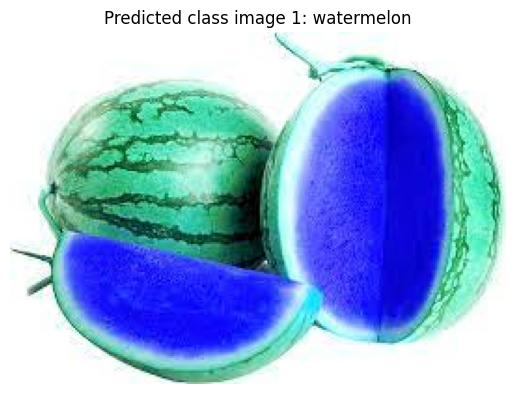

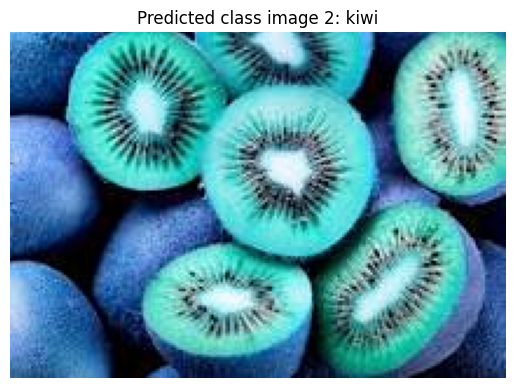

In [ ]:
# Show result
plt.imshow(image1)
plt.title("Predicted class image 1: " + predicted_class1)
plt.axis('off')
plt.show()

plt.imshow(image2)
plt.title("Predicted class image 2: " + predicted_class2)
plt.axis('off')
plt.show()